# Giới thiệu DT là thuật toán dùng để làm gì ?
- Mục tiêu là tạo ra một mô hình dự đoán giá trị của biến mục tiêu bằng cách tìm hiểu các quy tắc quyết định đơn giản được suy ra từ các đặc điểm dữ liệu. 
# Nguyên lý hoạt động (Ý nghĩa Entropy và Giniindex)

In [1]:
# import thư viện
import pandas as pd
import numpy as np

In [2]:
# Đọc dữ liệu
df = pd.read_csv('E:\\CODE\\python\\Machine_learning\\decision_tree\\heart_disease\\heart\\heart.csv')
columns_names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']
dataset = pd.DataFrame(data=df, columns=columns_names)
dataset 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
# Tạo dữ liệu để train model
y = df['target'].values
X = df.drop(columns=['target']).values

In [4]:
# Nomarlization 
df = df.apply(lambda x: (x - x.min())/(x.max() - x.min()))
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1.0,0.0,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000,0.0
1,0.500000,1.0,0.0,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000,0.0
2,0.854167,1.0,0.0,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000,0.0
3,0.666667,1.0,0.0,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000,0.0
4,0.687500,0.0,0.0,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667,0.0


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

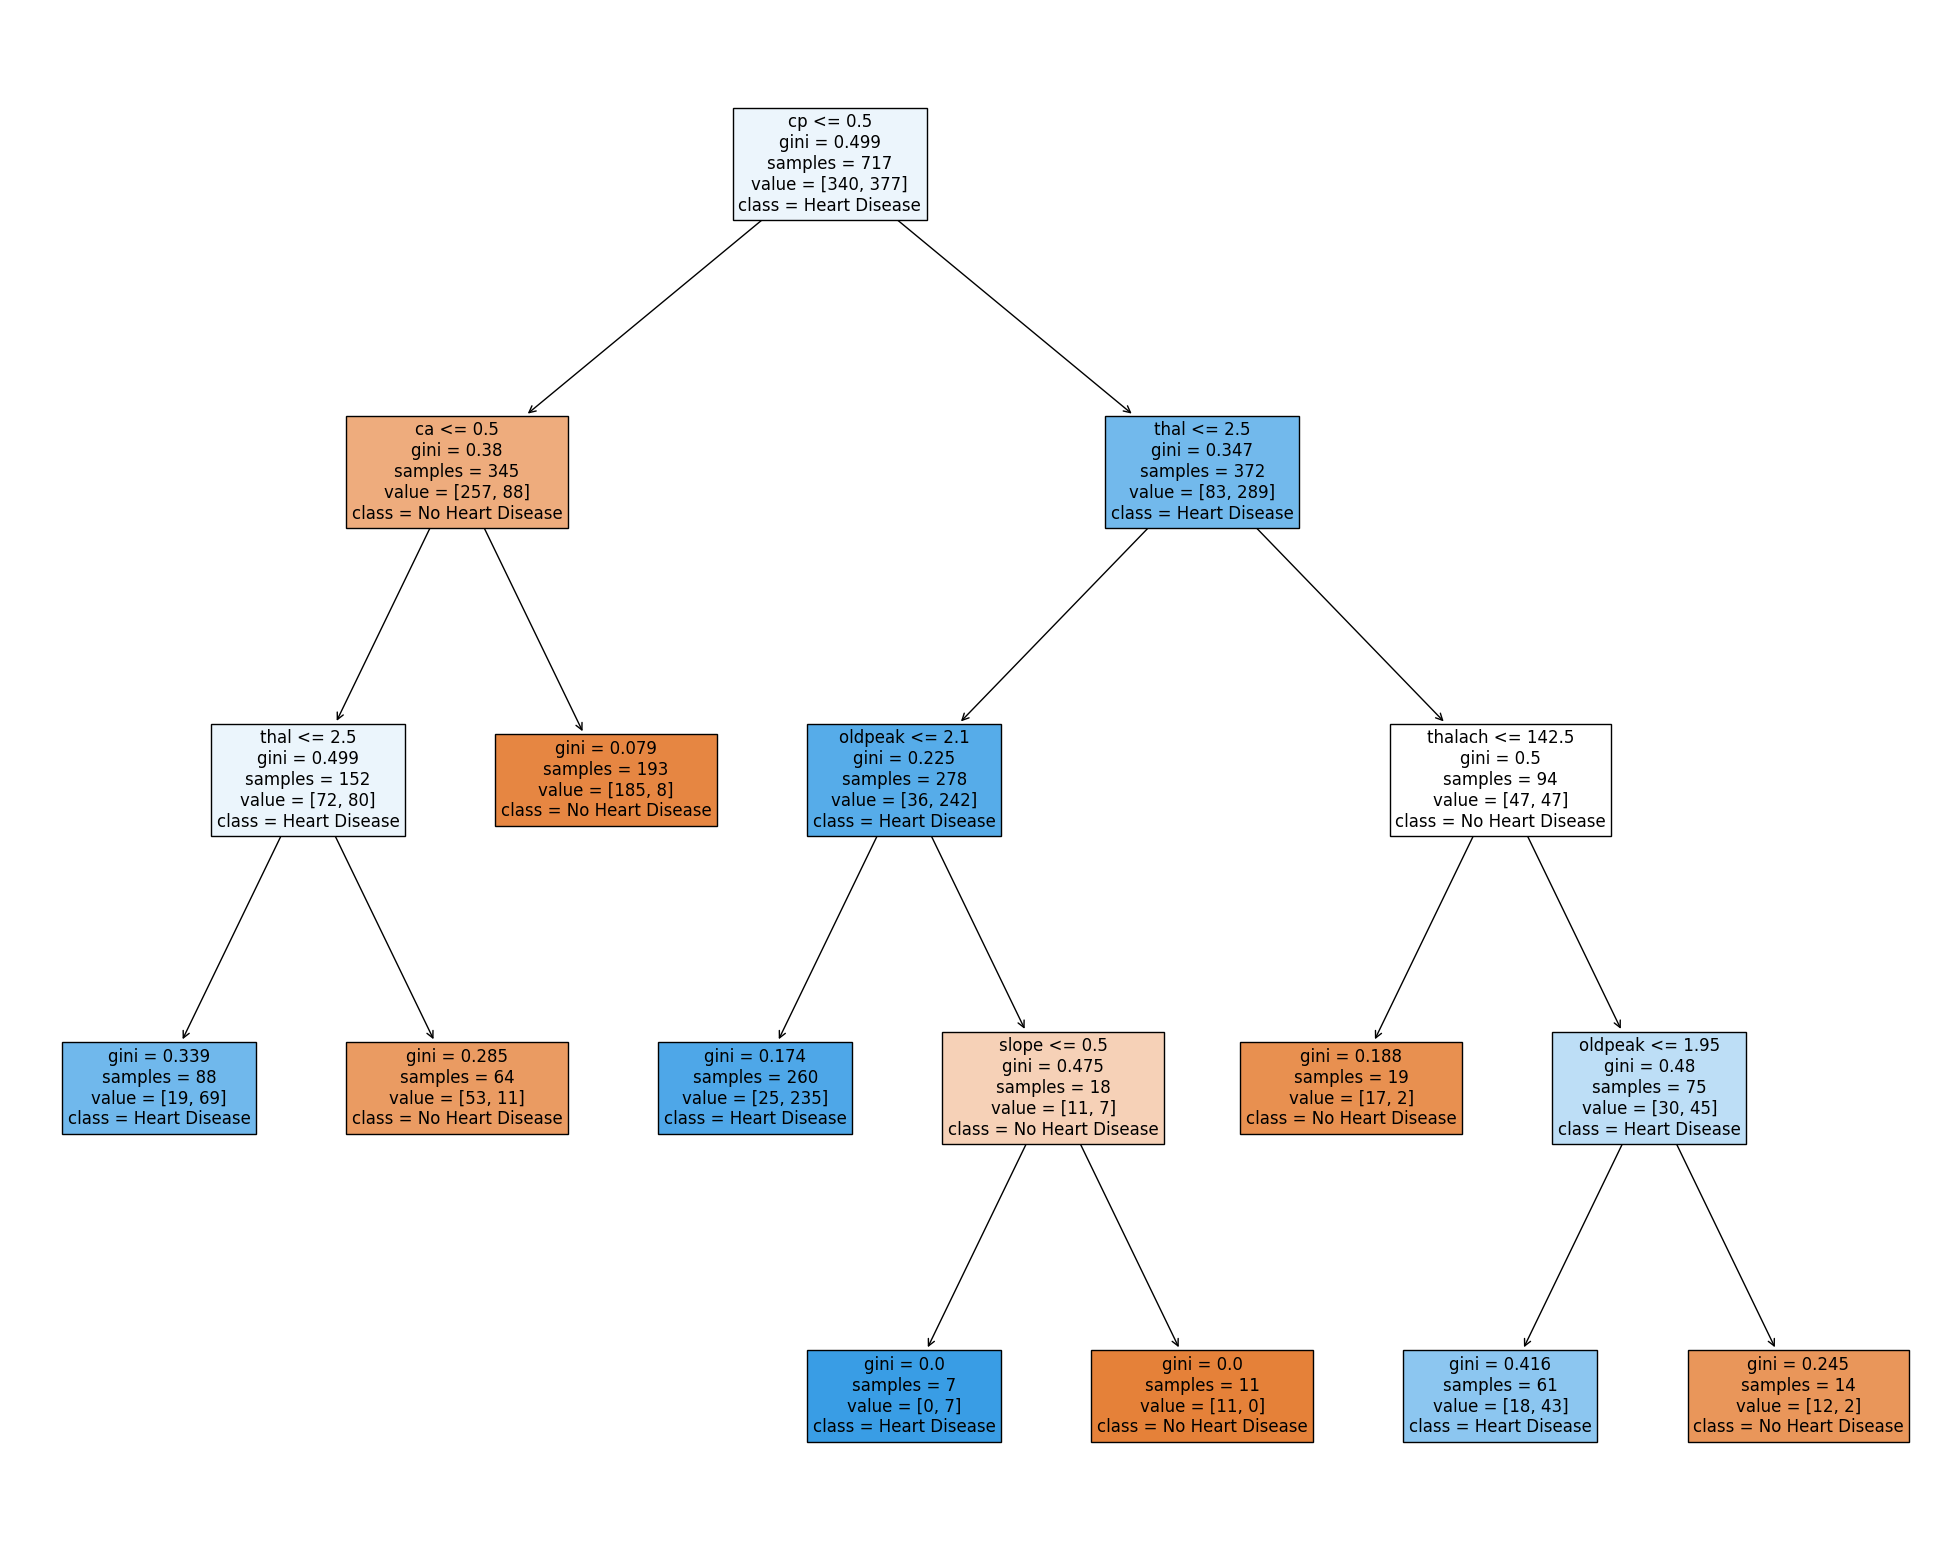

In [6]:
# Xây dựng cây
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
feature_names = columns_names
dtree = DecisionTreeClassifier(ccp_alpha=0.01, max_depth= 4, criterion='gini', random_state=42)
dtree = dtree.fit(X_train, y_train)
_ = tree.plot_tree(dtree, feature_names=feature_names, class_names={0:'No Heart Disease', 1:'Heart Disease'}, filled=True, fontsize=12)


In [7]:
# Dự đoán trên dữ liệu test 
from sklearn.metrics import classification_report

y_pred = dtree.predict(X_test)
print(classification_report(y_test, y_pred, labels=[0, 1]))  


              precision    recall  f1-score   support

           0       0.88      0.74      0.81       159
           1       0.76      0.89      0.82       149

    accuracy                           0.81       308
   macro avg       0.82      0.82      0.81       308
weighted avg       0.82      0.81      0.81       308



In [8]:
from sklearn import metrics
accuary = metrics.accuracy_score(y_test, y_pred)
print("y_test: ", y_test)
print("predictions: ", y_pred)
print("accuary: ", accuary)
f1_score = metrics.f1_score(y_test, y_pred)
print("f1_score: ", f1_score)


y_test:  [1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1
 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1
 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0
 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1
 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1
 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0
 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0
 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1
 1 0 0 1 0 0 1 1 0 0 0 0]
predictions:  [1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0
 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 1
 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1
 1 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 